In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen as uReq


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from matplotlib import rcParams

%matplotlib inline

In [2]:
qb_18 = pd.read_csv('FantasyPros_Fantasy_Football_Statistics_QB.csv')
rb_18 = pd.read_csv('FantasyPros_Fantasy_Football_Statistics_RB.csv')
wr_18 = pd.read_csv('FantasyPros_Fantasy_Football_Statistics_WR.csv')
te_18 = pd.read_csv('FantasyPros_Fantasy_Football_Statistics_TE.csv')
k_18 = pd.read_csv('FantasyPros_Fantasy_Football_Statistics_K.csv')
dst_18 = pd.read_csv('FantasyPros_Fantasy_Football_Statistics_DST.csv')



qb_20 = pd.read_csv('')
rb_20 = pd.read_csv('')
wr_20 = pd.read_csv('')
te_20 = pd.read_csv('')
k_20 = pd.read_csv('')
dst_20 = pd.read_csv('')



In [3]:
qb_18.head(3)

,Rank,Player,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,ATT.1,YDS.1,TD.1,FL,G,FPTS,FPTS/G,OWN
0,1.0,Patrick Mahomes II (KC),383.0,580.0,66.0,"5,097",8.8,50.0,12.0,26.0,60.0,272.0,2.0,2.0,16.0,417.0,26.1,100.0%
1,2.0,Matt Ryan (ATL),422.0,608.0,69.4,"4,924",8.1,35.0,7.0,42.0,33.0,125.0,3.0,5.0,16.0,354.5,22.2,84.9%
2,3.0,Ben Roethlisberger (PIT),452.0,675.0,67.0,"5,129",7.6,34.0,16.0,24.0,31.0,98.0,3.0,2.0,16.0,341.5,21.3,86.8%


In [4]:
rb_18.head(30)

,Rank,Player,ATT,YDS,Y/A,LG,20+,TD,REC,TGT,YDS.1,Y/R,TD.1,FL,G,FPTS,FPTS/G,OWN
0,1.0,Todd Gurley II (ATL),256.0,"1,251",4.9,36.0,11.0,17.0,59.0,81.0,580.0,9.8,4.0,1.0,14.0,342.6,24.5,96.8%
1,2.0,Saquon Barkley (NYG),261.0,"1,307",5.0,78.0,16.0,11.0,91.0,121.0,721.0,7.9,4.0,0.0,16.0,340.3,21.3,24.2%
2,3.0,Christian McCaffrey (CAR),219.0,"1,098",5.0,59.0,6.0,7.0,107.0,124.0,867.0,8.1,6.0,1.0,16.0,332.0,20.8,99.5%
3,4.0,Alvin Kamara (NO),194.0,883,4.6,49.0,1.0,14.0,81.0,105.0,709.0,8.8,4.0,0.0,15.0,313.7,20.9,100.0%
4,5.0,Ezekiel Elliott (DAL),304.0,"1,435",4.7,41.0,11.0,6.0,77.0,95.0,567.0,7.4,3.0,1.0,15.0,290.7,19.4,99.2%
5,6.0,James Conner (PIT),215.0,973,4.5,30.0,9.0,12.0,55.0,71.0,497.0,9.0,1.0,2.0,13.0,252.5,19.4,97.2%
6,7.0,Melvin Gordon III (DEN),175.0,885,5.1,34.0,9.0,10.0,50.0,66.0,490.0,9.8,4.0,0.0,12.0,250.5,20.9,91.6%
7,8.0,James White (NE),94.0,425,4.5,27.0,5.0,5.0,87.0,123.0,751.0,8.6,7.0,0.0,16.0,233.1,14.6,61.8%
8,9.0,Joe Mixon (CIN),237.0,"1,168",4.9,51.0,11.0,8.0,43.0,55.0,296.0,6.9,1.0,0.0,14.0,221.9,15.9,88.0%
9,10.0,David Johnson (HOU),258.0,940,3.6,53.0,2.0,7.0,50.0,76.0,446.0,8.9,3.0,2.0,16.0,221.7,13.9,86.4%


In [5]:
wr_18.head(3)

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,OWN
0,1.0,Tyreek Hill (KC),87.0,137.0,"1,479",17.0,75.0,27.0,12.0,22.0,151.0,1.0,0.0,16.0,284.5,17.8,100.0%
1,2.0,DeAndre Hopkins (ARI),115.0,163.0,"1,572",13.7,49.0,23.0,11.0,1.0,-7.0,0.0,2.0,16.0,276.0,17.3,100.0%
2,3.0,Davante Adams (GB),111.0,169.0,"1,386",12.5,57.0,18.0,13.0,0.0,0.0,0.0,0.0,15.0,274.1,18.3,100.0%


In [6]:
te_18.head(3)

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,OWN
0,1.0,Travis Kelce (KC),103.0,150.0,"1,336",13.0,43.0,18.0,10.0,0.0,0.0,0.0,1.0,16.0,243.1,15.2,100.0%
1,2.0,Zach Ertz (PHI),116.0,156.0,"1,163",10.0,34.0,13.0,8.0,0.0,0.0,0.0,0.0,16.0,222.3,13.9,62.4%
2,3.0,George Kittle (SF),88.0,135.0,"1,377",15.6,85.0,20.0,5.0,1.0,10.0,0.0,0.0,16.0,214.7,13.4,72.8%


In [7]:
k_18.head(2)

,Rank,Player,FG,FGA,PCT,LG,1-19,20-29,30-39,40-49,50+,XPT,XPA,G,FPTS,FPTS/G,OWN
0,1.0,Ka'imi Fairbairn (HOU),37.0,42.0,88.1,54.0,1.0,9.0,11.0,12.0,4.0,39.0,41.0,16.0,170.0,10.6,16.1%
1,2.0,Justin Tucker (BAL),35.0,39.0,89.7,56.0,0.0,12.0,9.0,9.0,5.0,36.0,37.0,16.0,160.0,10.0,95.6%


In [8]:
dst_18.head(3)

,Rank,Player,SACK,INT,FR,FF,DEF TD,SFTY,SPC TD,G,FPTS,FPTS/G,OWN
0,1.0,Chicago Bears (CHI),50.0,27.0,9.0,17.0,6.0,1.0,0.0,16.0,191.0,11.9,69.0%
1,2.0,Los Angeles Rams (LAR),41.0,18.0,12.0,12.0,4.0,2.0,0.0,16.0,147.0,9.2,77.0%
2,3.0,Houston Texans (HOU),43.0,15.0,14.0,19.0,4.0,0.0,0.0,16.0,144.0,9.0,10.7%


In [9]:
qb_18.shape

(142, 18)

In [10]:
rb_18.shape

(302, 18)

In [11]:
wr_18.shape

(455, 17)

In [12]:
te_18.shape

(259, 17)

In [13]:
k_18.shape

(85, 17)

In [14]:
dst_18.shape

(34, 13)

In [15]:
wr_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rank    453 non-null    float64
 1   Player  453 non-null    object 
 2   REC     453 non-null    float64
 3   TGT     453 non-null    float64
 4   YDS     453 non-null    object 
 5   Y/R     453 non-null    float64
 6   LG      453 non-null    float64
 7   20+     453 non-null    float64
 8   TD      453 non-null    float64
 9   ATT     453 non-null    float64
 10  YDS.1   453 non-null    float64
 11  TD.1    453 non-null    float64
 12  FL      453 non-null    float64
 13  G       453 non-null    float64
 14  FPTS    453 non-null    float64
 15  FPTS/G  453 non-null    float64
 16  OWN     453 non-null    object 
dtypes: float64(14), object(3)
memory usage: 60.6+ KB


In [26]:
wr_top_10_18 = wr_18.head(10)
wr_10_18 = wr_top_10_18[['FPTS']]
wr_10_18
#'Rank', 

,FPTS
0,284.5
1,276.0
2,274.1
3,271.7
4,269.3
5,253.0
6,250.8
7,241.4
8,241.4
9,222.6


In [27]:
rb_top_10_18 = rb_18.head(10)
rb_10_18 = rb_top_10_18[['FPTS']]
rb_10_18
#'Rank', 

,FPTS
0,342.6
1,340.3
2,332.0
3,313.7
4,290.7
5,252.5
6,250.5
7,233.1
8,221.9
9,221.7


In [28]:
qb_top_10_18 = qb_18.head(10)
qb_10_18 = qb_top_10_18[['FPTS']]
qb_10_18
#'Rank', 

,FPTS
0,417.0
1,354.5
2,341.5
3,331.9
4,327.6
5,312.5
6,310.3
7,304.3
8,298.9
9,285.7


In [29]:
te_top_10_18 = te_18.head(10)
te_10_18 = te_top_10_18[['FPTS']]
te_10_18
#'Rank', 

,FPTS
0,243.1
1,222.3
2,214.7
3,189.2
4,159.6
5,127.5
6,120.1
7,119.4
8,115.9
9,108.0


In [30]:
k_top_10_18 = k_18.head(10)
k_10_18 = k_top_10_18[['FPTS']]
k_10_18
#'Rank', 

,FPTS
0,170.0
1,160.0
2,151.0
3,151.0
4,147.0
5,145.0
6,141.0
7,139.0
8,138.0
9,138.0


In [31]:
dst_top_10_18 = dst_18.head(10)
dst_10_18 = dst_top_10_18[['FPTS']]
dst_10_18
#'Rank', 

,FPTS
0,191.0
1,147.0
2,144.0
3,135.0
4,126.0
5,124.0
6,123.0
7,122.0
8,122.0
9,120.0


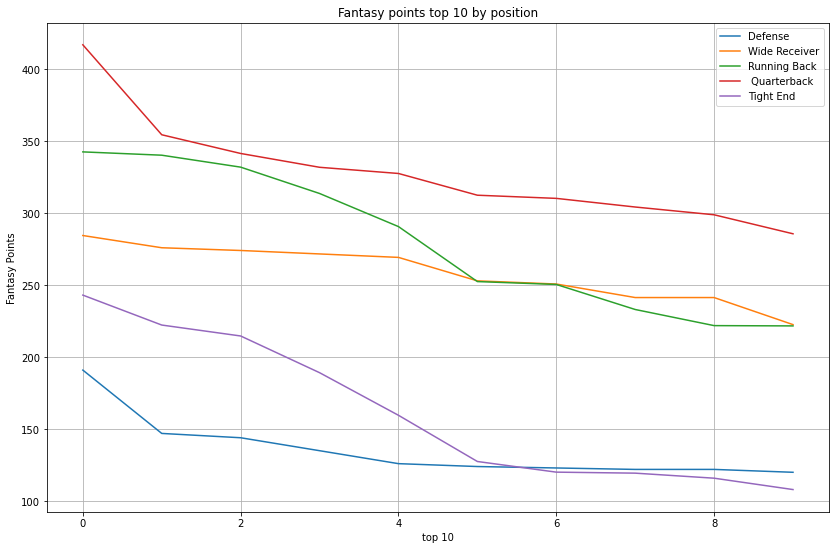

In [32]:
rcParams['figure.figsize'] = 14,9
plt.plot(dst_10_18, label = "Defense")
plt.plot(wr_10_18, label = "Wide Receiver")
plt.plot(rb_10_18, label = "Running Back")
plt.plot(qb_10_18, label = " Quarterback")
plt.plot(te_10_18, label = "Tight End")
plt.grid(True)
plt.title('Fantasy points top 10 by position')
plt.xlabel('top 10')
plt.ylabel('Fantasy Points')
plt.legend(loc = 1)